In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#this will allow the plot to be inline in the browser
%matplotlib inline
import math

/Users/marta/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Degree Distribution 

## Intro

In [2]:
# (1.1) define random graphs
G1 = nx.erdos_renyi_graph (50,0.01) #inputs are (N,p)
G2 = nx.erdos_renyi_graph (50,0.02)
G3 = nx.erdos_renyi_graph (50,0.04)
G4 = nx.erdos_renyi_graph (50,0.08)


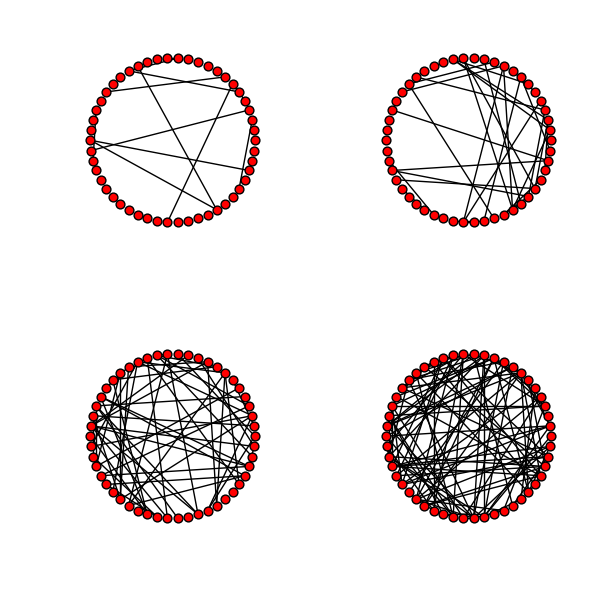

In [3]:
# (1.2) Plot random graphs: 

#Circular plots: use "nx.draw_circular"
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
nx.draw_circular(G1,node_size = 40)
plt.subplot(2,2,2)
nx.draw_circular(G2,node_size = 40)
plt.subplot(2,2,3)
nx.draw_circular(G3,node_size = 40)
plt.subplot(2,2,4)
nx.draw_circular(G4,node_size = 40)


(-0.28055422973697181,
 0.48294236894074632,
 -1.0892037132655916,
 0.4814340493604507)

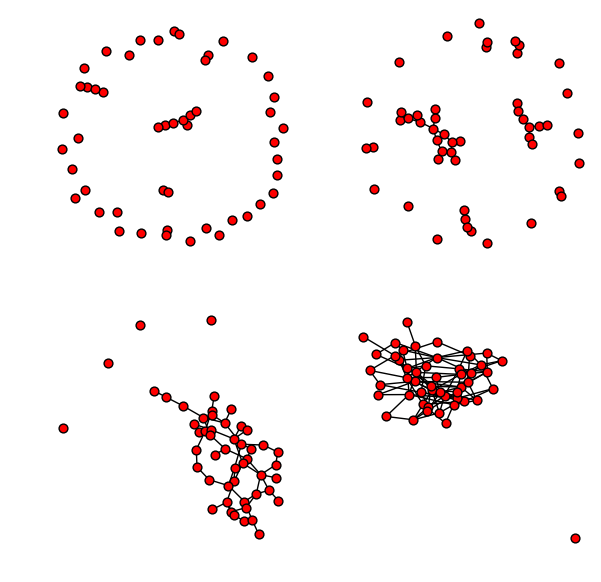

In [4]:
# (1.3) "Spring layout": use "nx.spring_layout"
fig = plt.figure(figsize=(7,7))
pos = nx.spring_layout(G4 ,iterations =1000)
plt.subplot(2,2,1)
nx.draw(G1 ,node_size =40); plt.axis('tight')
plt.subplot(2,2,2)
nx.draw(G2 ,node_size =40); plt.axis('tight')
plt.subplot(2,2,3)
nx.draw(G3 ,node_size =40); plt.axis('tight')
plt.subplot(2,2,4)
nx.draw(G4 ,node_size =40); plt.axis('tight')

### Exercise 1: How does degree distribution change with p (keeping N constant)? 

Step 1: Make four random graphs with the same number of nodes (pick a number in range 50-200) but different probabilities. (Hint: look at box 1.1). 

In [5]:
G1 = nx.erdos_renyi_graph (1000,0.01)
G2 = nx.erdos_renyi_graph (1000,0.02)
G3 = nx.erdos_renyi_graph (1000,0.04)
G4 = nx.erdos_renyi_graph (1000,0.08)

Step 2: Plot the degree distributions as histograms in four separate subplots. Label the axes, set your own figuresize and make sure that the plots have different colors.

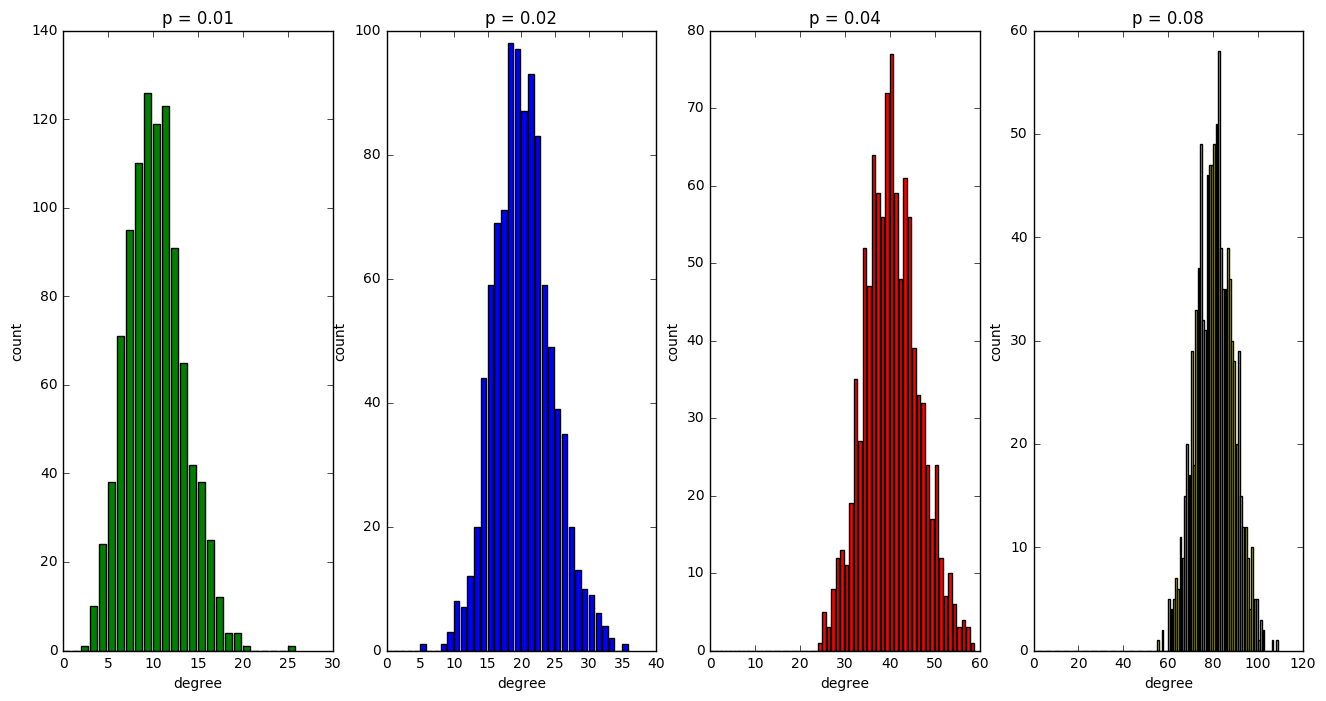

In [6]:
#G1:
degrees1 = dict(nx.degree(G1)).values()
counts1,bins1 = np.histogram(degrees1,bins=np.arange(0,np.max(degrees1)+2))
#G2:
degrees2 = dict(nx.degree(G2)).values()
counts2,bins2 = np.histogram(degrees2,bins=np.arange(0,np.max(degrees2)+2))
#G3:
degrees3 = dict(nx.degree(G3)).values()
counts3,bins3 = np.histogram(degrees3,bins=np.arange(0,np.max(degrees3)+2))
#G4:
degrees4 = dict(nx.degree(G4)).values()
counts4,bins4 = np.histogram(degrees4,bins=np.arange(0,np.max(degrees4)+2))

plt.figure(figsize=(16,8)) #you only have to use this line once and fill in the blank spaces

#G1:
plt.subplot(1,4,1)
plt.bar(bins1[:-1],counts1,color='g')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('p = 0.01')

#G2:
plt.subplot(1,4,2)
plt.bar(bins2[:-1],counts2,color='b')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('p = 0.02')

#G3:
plt.subplot(1,4,3)
plt.bar(bins3[:-1],counts3,color='r')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('p = 0.04')

#G4:
plt.subplot(1,4,4)
plt.bar(bins4[:-1],counts4,color='y')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('p = 0.08')

Step 3: What happens with the average degrees as p increases in size?

In [7]:
# Print out the average degrees and normalized standard deviatons for each graph
print "Average degree for p = 0.01 is ",np.mean(degrees1)
print "Average degree for p = 0.02 is ",np.mean(degrees2)
print "Average degree for p = 0.04 is ",np.mean(degrees3)
print "Average degree for p = 0.08 is ",np.mean(degrees4)
#
print "Standard deviation for p = 0.01 is ",np.std(degrees1)," and sqrt(k)= ",math.sqrt(np.mean(degrees1))
print "Stardard deviation for p = 0.02 is ",np.std(degrees2)," and sqrt(k)= ",math.sqrt(np.mean(degrees2))
print "Standard deviation for p = 0.04 is ",np.std(degrees3)," and sqrt(k)= ",math.sqrt(np.mean(degrees3))
print "Standard deviation for p = 0.08 is ",np.std(degrees4)," and sqrt(k)= ",math.sqrt(np.mean(degrees4))

Average degree for p = 0.01 is  9.858
Average degree for p = 0.02 is  19.836
Average degree for p = 0.04 is  39.934
Average degree for p = 0.08 is  80.038
Standard deviation for p = 0.01 is  3.16098655486  and sqrt(k)=  3.13974521259
Stardard deviation for p = 0.02 is  4.29803489981  and sqrt(k)=  4.45376245437
Standard deviation for p = 0.04 is  6.05587681513  and sqrt(k)=  6.31933540809
Standard deviation for p = 0.08 is  8.30641655589  and sqrt(k)=  8.94639592238


Step 4: How does the degree distribution change with p? Why? 

Hint: Think about why the degree distribution shifts.

As the probability increases, more links are likely to form. Therefore, the average degree will be higher, and we will see that the distribution shifts to the right.

### Exercise 2: How does the degree distribution change with N (keeping < k > constant)? 

In class, we talked about how random graphs' degree distributions follow the Binominal distribution and that this approximates a Poisson distribution when N >> k. The aim of this exericise is to visualize this by plotting the degree distributions for various N.

Remember that p = < k >/N for random graphs. By setting < k > = 8.0 for all of them (or any other constant number), the degree distributions will have the same center and we can easily compare the shapes.

Note that the input for erdos_renyi_graph is (N,p). You can substitute p for < k >/N, and in this way easily fix the < k > and and vary N or p. 

Step 1: Make three random graphs with 100, 1000, and 10000 nodes each and constant < k > = 8.0. 


In [8]:
G1 = nx.erdos_renyi_graph (100,8.0/100)
G2 = nx.erdos_renyi_graph (1000,8.0/1000)
G3 = nx.erdos_renyi_graph (10000,8.0/10000)

Step 2: Apply the histogram function to each of the graphs (as in Exercise 1). However, to plot use plt.plot instead of plt.bar this time. 

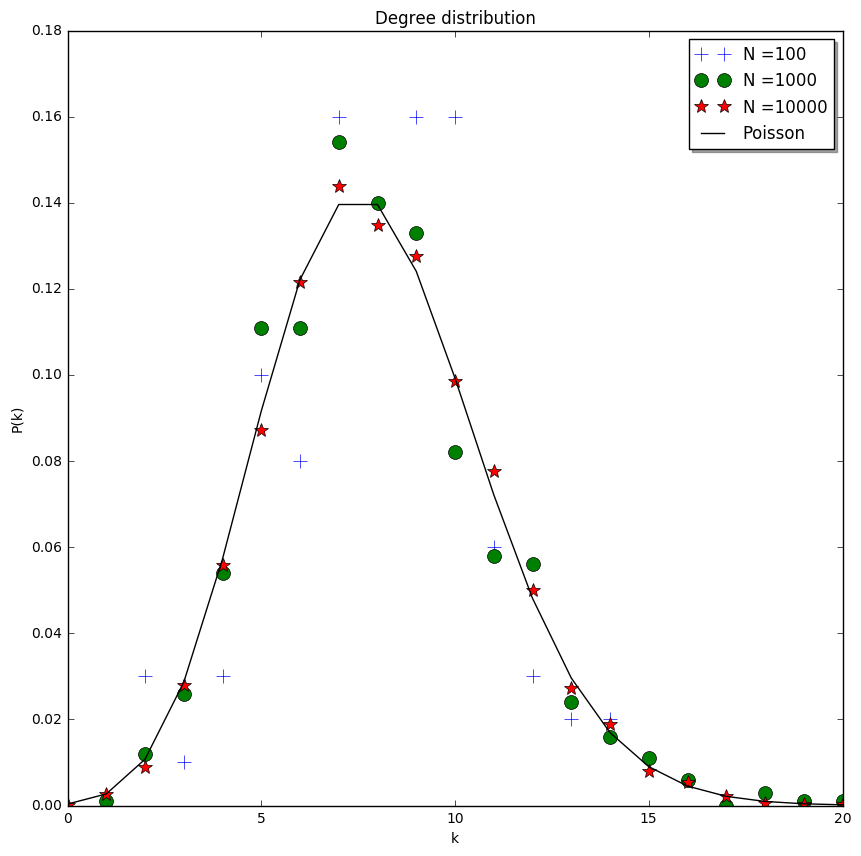

In [9]:
from scipy.stats import poisson #import to use Poisson distribution

#G1:
degs1 = dict(nx.degree(G1)).values()
n1, bins1 = np.histogram(degs1, bins = range(min(degs1), max(degs1)+1, 1), normed="True")

#G2:
degs2 = dict(nx.degree(G2)).values()
n2, bins2 = np.histogram(degs2, bins = range(min(degs2), max(degs2)+1, 1), normed="True")

#G3:
degs3 = dict(nx.degree(G3)).values()
n3, bins3 = np.histogram(degs3, bins = range(min(degs3), max(degs3)+1, 1), normed="True")

#to plot:
plt.figure(figsize=(10,10)) #use once and set figure size

plt.plot(bins1[:-1],n1,'b+', markersize=10, label="N =100") 
plt.plot(bins2[:-1],n2,'go', markersize=10, label="N =1000") 
plt.plot(bins3[:-1],n3,'r*', markersize=10, label="N =10000") 

#To make a Poission distribution:
k=range(0,21)
plt.plot(k,poisson.pmf(k,8),'k',label='Poisson',)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Degree distribution')
plt.legend(loc='upper right', shadow=True)
#Make a title, a legend, and label axes.

See here for Poisson distribution
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.poisson.html

#Clustering Coefficient

We want to investigate how the average clustering coefficient changes with size (i.e. number of nodes) of the graph. Remember that c = < k >/N. 

In order to compare how C changes with N between the graphs, we need to keep < k > constant. Use < k > = 10.0 for this exercise.

Step 1: Make seven graphs with 10, 50, 100, 500, 1000, 5000, 10000 nodes respectively. 

In [10]:
N1 = 10
G1 = nx.fast_gnp_random_graph(N1,10.0/N1)

N2 = 50
G2 = nx.fast_gnp_random_graph(N2,10.0/N2)

N3 = 100
G3 = nx.fast_gnp_random_graph(N3,10.0/N3)

N4 = 500
G4 = nx.fast_gnp_random_graph(N4,10.0/N4)

N5 = 1000
G5 = nx.fast_gnp_random_graph(N5,10.0/N5)

N6 = 5000
G6 = nx.fast_gnp_random_graph(N6,10.0/N6)

N7 = 10000
G7 = nx.fast_gnp_random_graph(N7,10.0/N7)

Step 2: Use the two empty lists to store the number of nodes and the corresponding coefficients using the append function.

In [11]:
size = []
cluster = []

cluster.append(nx.average_clustering(G1))
size.append(N1)

cluster.append(nx.average_clustering(G2))
size.append(N2)

cluster.append(nx.average_clustering(G3))
size.append(N3)

cluster.append(nx.average_clustering(G4))
size.append(N4)

cluster.append(nx.average_clustering(G5))
size.append(N5)

cluster.append(nx.average_clustering(G6))
size.append(N6)

cluster.append(nx.average_clustering(G7))
size.append(N7)


Step 3: Plot nodes on the x-axis and coeff on the y-axis on a loglog plot

In [12]:
cP = []
Nmat = []
for N in range(1,10001,50):
    Nmat.append(N)
    cP.append(10.0/N)

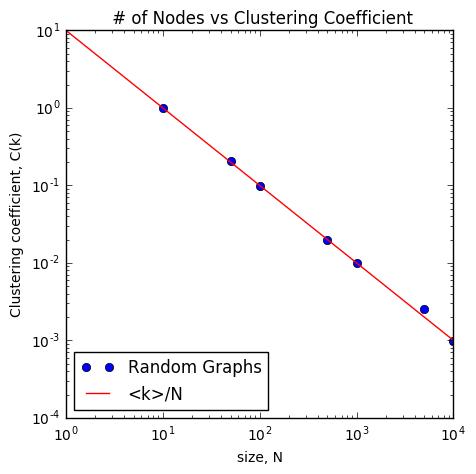

In [13]:
plt.figure(figsize=(5,5))
plt.loglog(size,cluster,'bo',label='Random Graphs')
plt.plot(Nmat,cP,'r-',label='<k>/N')
plt.legend(loc='lower left')
plt.title(' # of Nodes vs Clustering Coefficient')
plt.xlabel('size, N')
plt.ylabel('Clustering coefficient, C(k)')

#Shortest Path

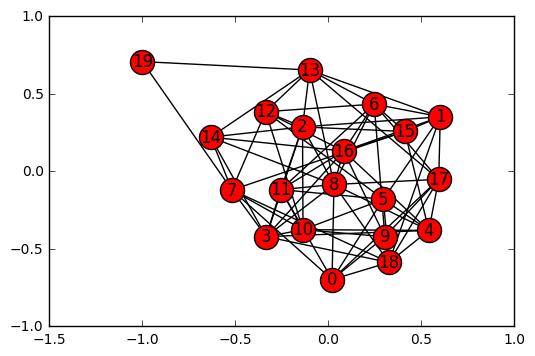

In [14]:
G=nx.fast_gnp_random_graph(20,0.4,seed=None,directed=False)
nx.draw_networkx(G, pos=None, with_labels=True)

### 2 - Print the average shortest path for your random graph.

average_shortest_path_length(the network you created)

In [15]:
print(nx.average_shortest_path_length(G))

1.63157894737


### 3 - Create a scatter plot with probability of edge creation ranging from 10% to 95% on the x-axis and the average shortest path on the y-axis.

Remember, Python does not allow you to iterate normally with doubles/floats. Iterate from 0 to 85 and then manipulate your counter to range from 10% to 95%. Save your probability values in a list.
Create a random graph for each probability value. Then, find the average shortest path length for each of those graphs.
Store the average shortest path lengths in another list. Finally, use plt.scatter(x-values,y-values) to plot your results.

### 4 - Create a scatter plot with the number of nodes ranging from 10 to 10,000 on the x-axis and the average shortest path on the y-axis.

In [16]:
G=nx.fast_gnp_random_graph(1000,0.2,seed=3,directed=False)

In [22]:
pathLengthVals=[]
meandegVals=[]
#numNodes=[20,40,80,160,320,640,1280,2000,4000,8000] #this may take time to run about 30min
numNodes=[20,40,80,160,320,640]
ApproxL=[]
for i in range (len(numNodes)):
    G=nx.fast_gnp_random_graph(numNodes[i],10.0/numNodes[i],seed=3,directed=False)
    pathLengthVals.append(nx.average_shortest_path_length(G))
    meandegVals.append(np.mean(dict(nx.degree(G)).values()))
    ApproxL.append(math.log(numNodes[i])/math.log(meandegVals[i]))
    print numNodes[i]," ",nx.average_shortest_path_length(G)," ",ApproxL[i] 


20   1.57894736842   1.41558155554
40   1.83461538462   1.65022747296
80   2.1417721519   1.91354347542
160   2.42657232704   2.18073408389
320   2.73567789969   2.48971737264
640   3.04609741784   2.802382594


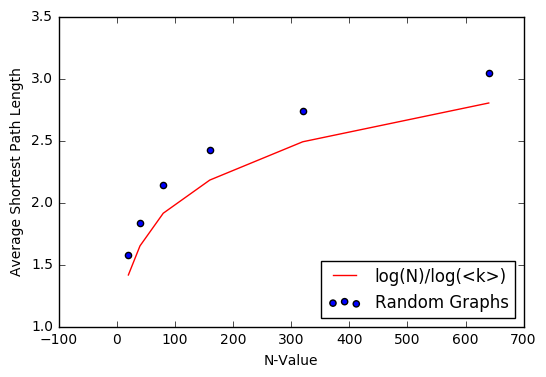

In [23]:
plt.scatter(numNodes,pathLengthVals,label='Random Graphs')
plt.plot(numNodes,ApproxL,'r-',label='log(N)/log(<k>)')
plt.xlabel('N-Value')
plt.ylabel('Average Shortest Path Length')
plt.legend(loc='lower right')

In [19]:
ApproxL

[1.4155815555351283,
 1.650227472957508,
 1.9135434754184442,
 2.1807340838850893,
 2.4897173726420245,
 2.8023825940022467]

In [20]:
numNodes

[20, 40, 80, 160, 320, 640]

In [21]:
pathLengthVals

[1.5789473684210527,
 1.8346153846153845,
 2.141772151898734,
 2.4265723270440254,
 2.7356778996865203,
 3.0460974178403757]